In [7]:
import pandas as pd
import mplfinance

## Playing with Dataset and Plotting

* Doing some basic data cleaning to coerce into the correct data types and inital playing with plotting

In [8]:
aapl = pd.read_csv('data/AAPL.csv',index_col=0,parse_dates=True)
aapl

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-03-20,$229.24,100423300,$247.18,$251.83,$228
2020-03-19,$244.78,67964260,$247.385,$252.84,$242.61
2020-03-18,$246.67,75058410,$239.77,$250,$237.12
2020-03-17,$252.86,81013970,$247.51,$257.61,$238.4
2020-03-16,$242.21,80605870,$241.95,$259.08,$240
...,...,...,...,...,...
2010-03-26,$32.9857,159986658,$32.7071,$33.1357,$32.65
2010-03-25,$32.3786,135463131,$32.9886,$32.9957,$32.3214
2010-03-24,$32.7671,149419805,$32.52,$32.8857,$32.5014


In [23]:
aapl.columns.str.strip()
aapl.__dict__

{'_is_copy': None,
 '_data': BlockManager
 Items: Index([' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')
 Axis 1: DatetimeIndex(['2010-03-22', '2010-03-23', '2010-03-24', '2010-03-25',
                '2010-03-26', '2010-03-29', '2010-03-30', '2010-03-31',
                '2010-04-01', '2010-04-05',
                ...
                '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
                '2020-03-13', '2020-03-16', '2020-03-17', '2020-03-18',
                '2020-03-19', '2020-03-20'],
               dtype='datetime64[ns]', name='Date', length=2518, freq=None)
 IntBlock: slice(1, 2, 1), 1 x 2518, dtype: int64
 ObjectBlock: [0, 2, 3, 4], 4 x 2518, dtype: object,
 '_item_cache': {' Close/Last': Date
  2010-03-22     $32.1071
  2010-03-23     $32.6228
  2010-03-24     $32.7671
  2010-03-25     $32.3786
  2010-03-26     $32.9857
                  ...    
  2020-03-16      $242.21
  2020-03-17      $252.86
  2020-03-18      $246.67
  2020-03-19      $

In [6]:
# Convert to pandas datetime representation
aapl['Date'] = pd.to_datetime(aapl['Date'])
aapl['Date']

0      2020-03-20
1      2020-03-19
2      2020-03-18
3      2020-03-17
4      2020-03-16
          ...    
2513   2010-03-26
2514   2010-03-25
2515   2010-03-24
2516   2010-03-23
2517   2010-03-22
Name: Date, Length: 2518, dtype: datetime64[ns]

In [7]:
# Convert $xx.xx string to float
aapl[' Close/Last'] = aapl[' Close/Last'].map(lambda v: v if type(v)== float else float(v.strip()[1:]))

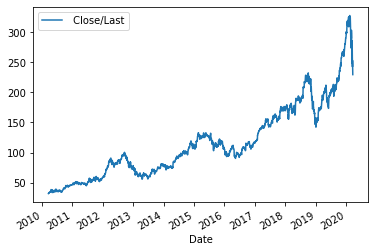

In [42]:
aapl.plot(x='Date',y=' Close/Last')

## SMA Crossover
* Basic indicator that looks at some form of moving average
* Shows the trend (and momentum??) of the asset
* Serves as a common indicator for exit and entry of a position
* https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [43]:
aapl_sma20 = aapl[' Close/Last'].rolling(20).mean()
aapl_sma50 = aapl[' Close/Last'].rolling(50).mean()

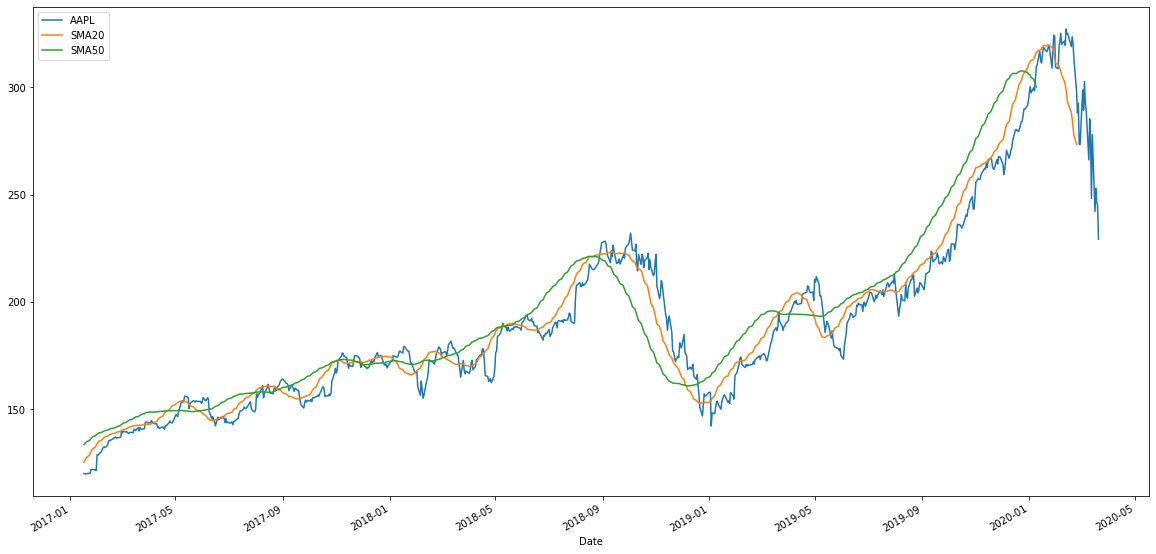

In [53]:
pd.DataFrame({
    'Date': aapl['Date'][:800],
    'AAPL': aapl[' Close/Last'][:800],
    'SMA20': aapl_sma20[:800],
    'SMA50': aapl_sma50[:800]
}).plot(x='Date', figsize=(20,10))

In [57]:
aapl_sma20.shape

(2518,)

In [58]:
aapl_sma50.shape

(2518,)

In [59]:
aapl.shape

(2518, 6)

In [60]:
aapl[:5]

,Date,Close/Last,Volume,Open,High,Low
0,2020-03-20,229.24,100423300,$247.18,$251.83,$228
1,2020-03-19,244.78,67964260,$247.385,$252.84,$242.61
2,2020-03-18,246.67,75058410,$239.77,$250,$237.12
3,2020-03-17,252.86,81013970,$247.51,$257.61,$238.4
4,2020-03-16,242.21,80605870,$241.95,$259.08,$240


## Fixing the SMA lines for the dates near the end
* Since rolling average starts from the start of the df, I need to actually sort the values before rolling

In [21]:
aapl.sort_values(by='Date')

,Close/Last,Volume,Open,High,Low
Date,,,,,
2010-03-22,$32.1071,113828294,$31.4957,$32.2857,$31.45
2010-03-23,$32.6228,150384825,$32.2343,$32.6828,$32.0143
2010-03-24,$32.7671,149419805,$32.52,$32.8857,$32.5014
2010-03-25,$32.3786,135463131,$32.9886,$32.9957,$32.3214
2010-03-26,$32.9857,159986658,$32.7071,$33.1357,$32.65
...,...,...,...,...,...
2020-03-16,$242.21,80605870,$241.95,$259.08,$240
2020-03-17,$252.86,81013970,$247.51,$257.61,$238.4
2020-03-18,$246.67,75058410,$239.77,$250,$237.12


In [9]:
aapl = aapl.sort_values(by='Date')
aapl_sma20 = aapl[' Close/Last'].rolling(20).mean()
aapl_sma50 = aapl[' Close/Last'].rolling(50).mean()

DataError: No numeric types to aggregate

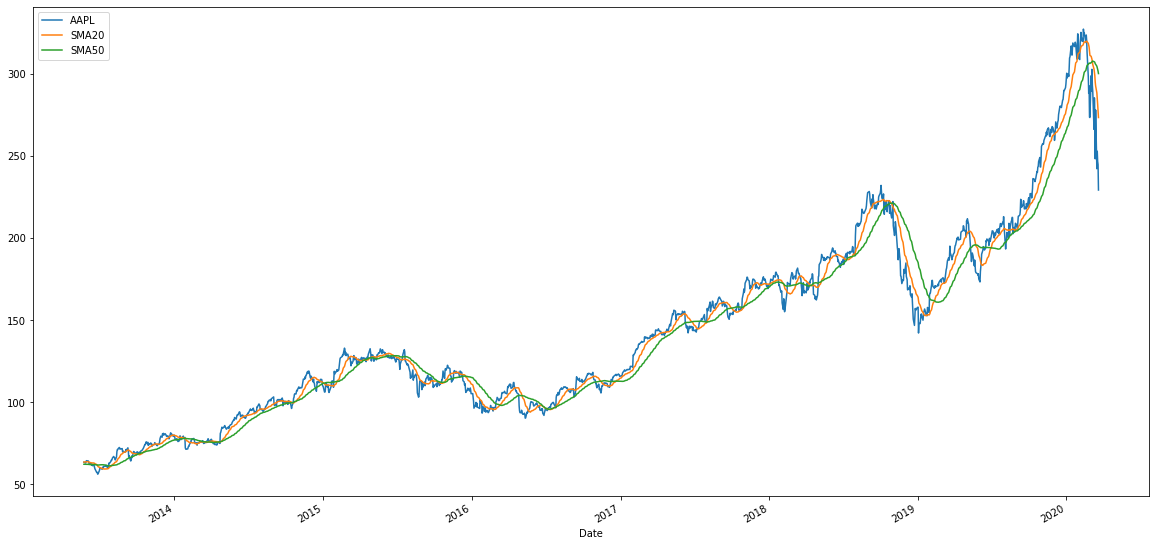

In [10]:
pd.DataFrame({
    'Date': aapl['Date'][800:],
    'AAPL': aapl[' Close/Last'][800:],
    'SMA20': aapl_sma20[800:],
    'SMA50': aapl_sma50[800:]
}).plot(x='Date', figsize=(20,10))

## Candlestick Charts with MAs
* Displyed using the mplfinance library (formerly matplotlib.finance before it was deprecated from the main library)

In [25]:
# mplfinance expects the index to be a datetimeindex
# this is fixed in the data import now
# aapl.index = aapl['Date']

In [11]:
# make column naming consistent
aapl = aapl.rename(columns={' Close/Last':'Close', ' Volume':'Volume', ' Open':'Open', ' High':'High', ' Low':'Low'})

In [12]:
# Convert $xx.xx string to float
aapl['Close'] = aapl['Close'].map(lambda v: v if type(v)== float else float(v.strip()[1:]))
aapl['Open'] = aapl['Open'].map(lambda v: v if type(v)== float else float(v.strip()[1:]))
aapl['High'] = aapl['High'].map(lambda v: v if type(v)== float else float(v.strip()[1:]))
aapl['Low'] = aapl['Low'].map(lambda v: v if type(v)== float else float(v.strip()[1:]))

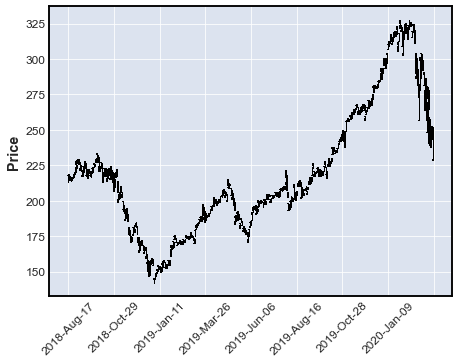

In [53]:
mplfinance.plot(aapl[-400:],type='candle')

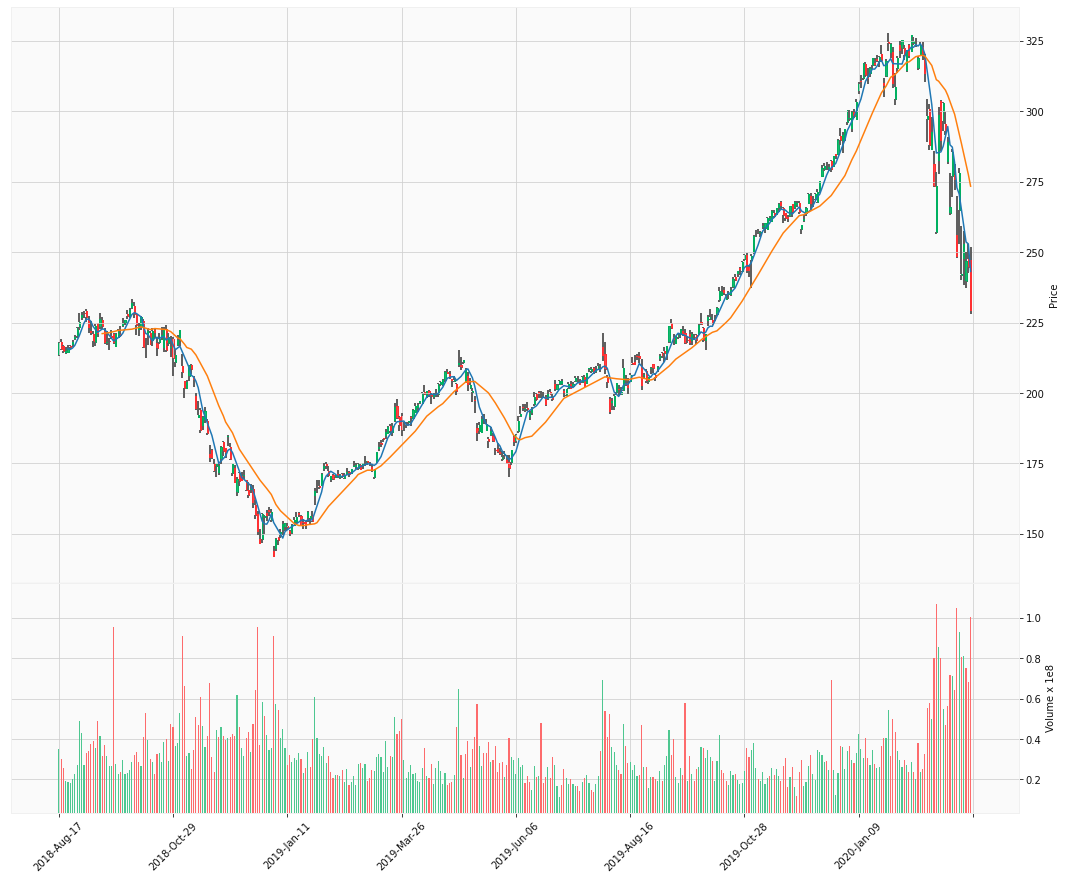

In [76]:
# https://github.com/matplotlib/mplfinance/blob/master/examples/customization_and_styles.ipynb

mc = mplfinance.make_marketcolors(up='g',down='r')

# First we set the kwargs that we will use for all of these examples:
kwargs = dict(type='candle',marketcolors=mc,mav=(5,20),volume=True,figratio=(20,16),figscale=1)

mplfinance.plot(aapl[-400:],**kwargs,style='yahoo')

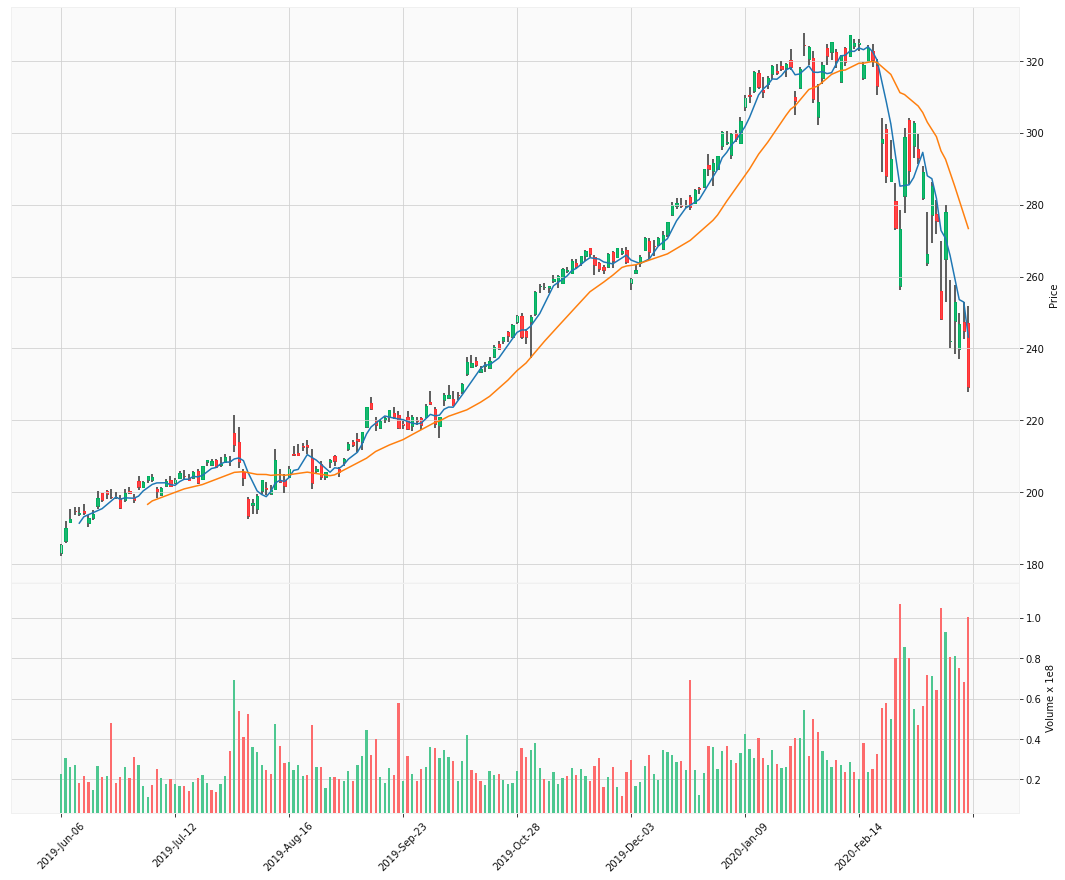

In [81]:
# the limit to it looking good is really ~200 days, unless I'm to increase the resolution
mplfinance.plot(aapl[-200:],**kwargs,style='yahoo')

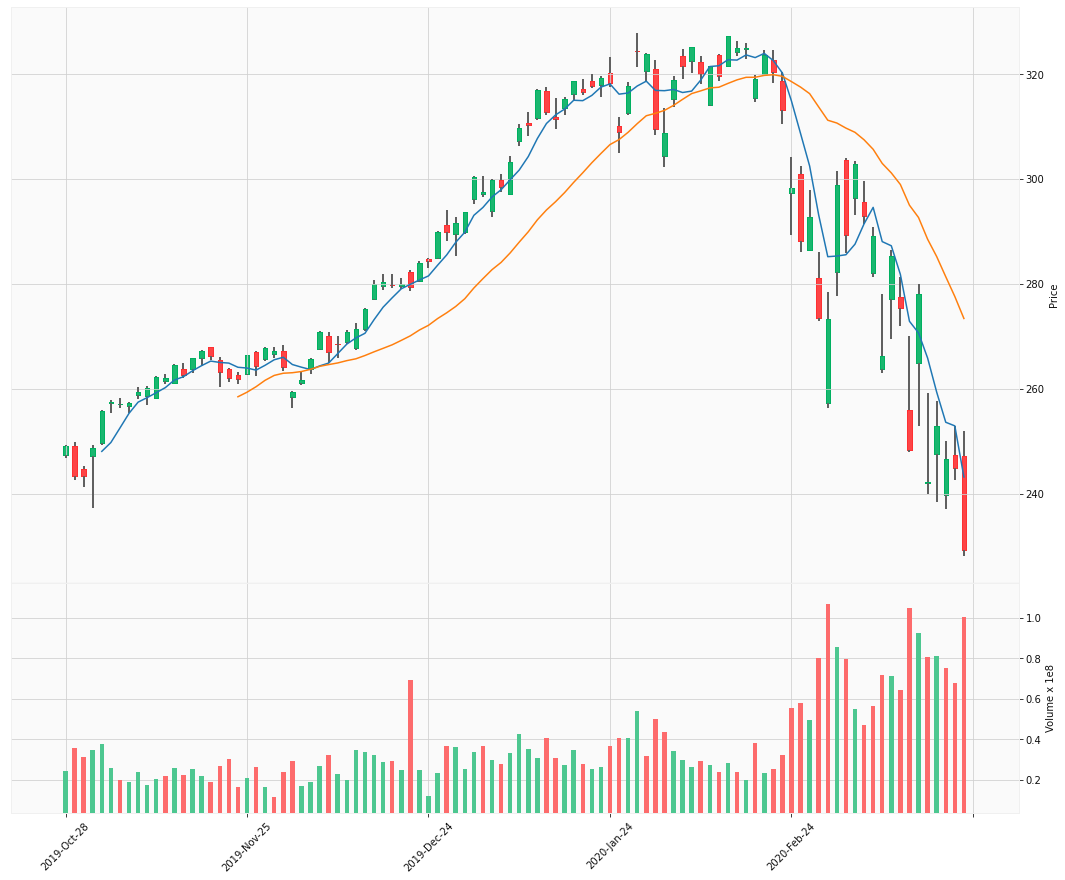

In [86]:
mplfinance.plot(aapl[-100:],**kwargs,style='yahoo')

## Backtesting and Playing with Strategies
* Plotting is cool and all, but it's hard to understand the % wins of plays can be made
* Unless we're visually inspecting these graphs, there's no indication of a buy or sell signal
* Running data through a backtester will help me formalize some of these ideas and to see if they hold in a real (historical) market

In [151]:
import backtrader as bt

<IPython.core.display.Javascript object>


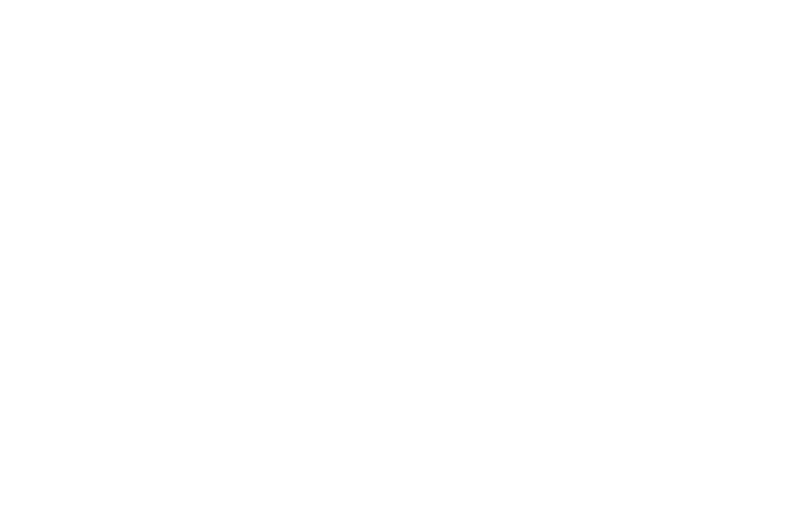

[[<Figure size 432x288 with 2 Axes>]]

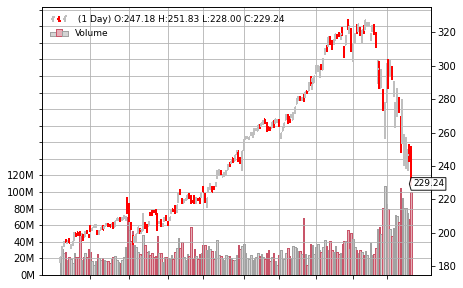

In [152]:
# Create a cerebro entity
cerebro = bt.Cerebro(stdstats=False)

# Add a strategy
cerebro.addstrategy(bt.Strategy)

# Create datafeed with pandas dataframe
data = bt.feeds.PandasData(dataname=aapl[-200:])

# Add datafeed to cerebro
cerebro.adddata(data)

# Run over everything
cerebro.run()

# Plot the result
cerebro.plot(style='bar')

In [116]:
class MAC_Strat(bt.Strategy):
    def __init__(self):
        sma1 = bt.indicators.SimpleMovingAverage(self.data)
        ema1 = bt.indicators.ExponentialMovingAverage()

        close_over_sma = self.data.close > sma1
        close_over_ema = self.data.close > ema1
        sma_ema_diff = sma1 - ema1

        self.buy_sig = bt.And(close_over_sma, close_over_ema, sma_ema_diff > 0)

    def next(self):
        if self.buy_sig:
            self.buy()
    

In [133]:
def try_strategy(strat):
    cerebro = bt.Cerebro(stdstats=False)
            
    cerebro.addstrategy(strat)

    # Create datafeed with pandas dataframe
    data = bt.feeds.PandasData(dataname=aapl)

    # Add datafeed to cerebro
    cerebro.adddata(data)

    # Run over everything
    cerebro.run()

    print(cerebro.broker.getvalue())

    # Plot the result
    cerebro.plot(style='bar')

In [131]:
class MACD_Strat(bt.Strategy):   
    '''
    This strategy is loosely based on some of the examples from the Van
    K. Tharp book: *Trade Your Way To Financial Freedom*. The logic:
      - Enter the market if:
        - The MACD.macd line crosses the MACD.signal line to the upside
        - The Simple Moving Average has a negative direction in the last x
          periods (actual value below value x periods ago)
     - Set a stop price x times the ATR value away from the close
     - If in the market:
       - Check if the current close has gone below the stop price. If yes,
         exit.
       - If not, update the stop price if the new stop price would be higher
         than the current
    '''
    params = (
        # Standard MACD Parameters
        ('macd1', 12),
        ('macd2', 26),
        ('macdsig', 9),
        ('atrperiod', 14),  # ATR Period (standard)
        ('atrdist', 3.0),   # ATR distance for stop price
        ('smaperiod', 30),  # SMA Period (pretty standard)
        ('dirperiod', 10),  # Lookback period to consider SMA trend direction
    )

    def notify_order(self, order):
        if order.status == order.Completed:
            pass

        if not order.alive():
            self.order = None  # indicate no order is pending

    def __init__(self):
        
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)

        # To set the stop price
        self.atr = bt.indicators.ATR(self.data, period=self.p.atrperiod)

        # Control market trend
        self.sma = bt.indicators.SMA(self.data, period=self.p.smaperiod)
        self.smadir = self.sma - self.sma(-self.p.dirperiod)

    def start(self):
        self.order = None  # sentinel to avoid operrations on pending order

    def next(self):
        if self.order:
            return  # pending order execution

        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.smadir < 0.0:
                self.order = self.buy()
                pdist = self.atr[0] * self.p.atrdist
                self.pstop = self.data.close[0] - pdist

        else:  # in the market
            pclose = self.data.close[0]
            pstop = self.pstop

            if pclose < pstop:
                self.close()  # stop met - get out
            else:
                pdist = self.atr[0] * self.p.atrdist
                # Update only if greater than
                self.pstop = max(pstop, pclose - pdist)

10146.377699999995


<IPython.core.display.Javascript object>


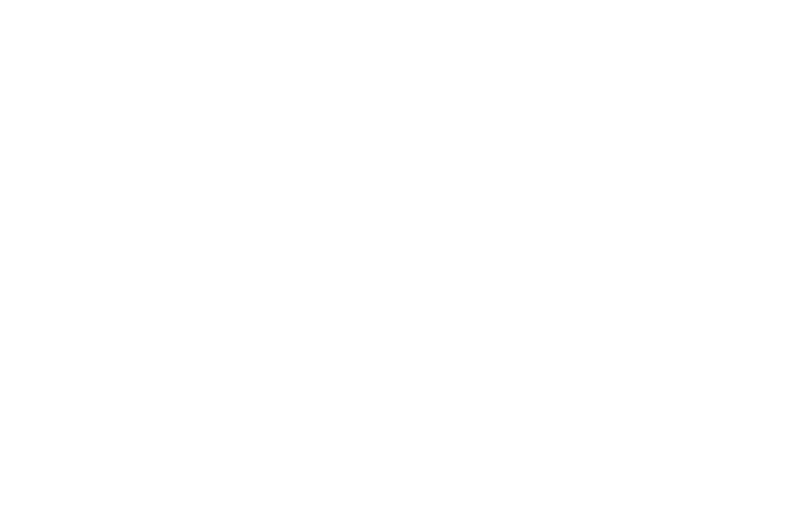

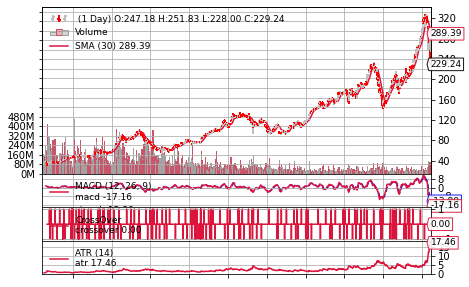

In [134]:
try_strategy(MACD_Strat)

## Using the TA-Lib plugin instead
* It's better documented
* The defacto way of using technical indicators programmatically

In [44]:
class TALibStrategy(bt.Strategy):
    def __init__(self):
        bt.talib.CDLDOJISTAR(self.data.open, self.data.high,self.data.low, self.data.close)
        # bt.talib.MACD(self.data.open, self.data.high,self.data.low, self.data.close)


def try_strat(data, strat):
    cerebro = bt.Cerebro()
    
    # Create datafeed with pandas dataframe
    data = bt.feeds.PandasData(dataname=data)

    # Add datafeed to cerebro
    cerebro.adddata(data)

    cerebro.addstrategy(strat)

    cerebro.run(stdstats=False)
   
    print(cerebro.broker.getvalue())
    pkwargs = dict(style='candle', barup = '#00b060', bardown = '#fe3032') # yahoo colors

    cerebro.plot(**pkwargs)

In [1]:
import talib
import backtrader as bt

10000.0


<IPython.core.display.Javascript object>


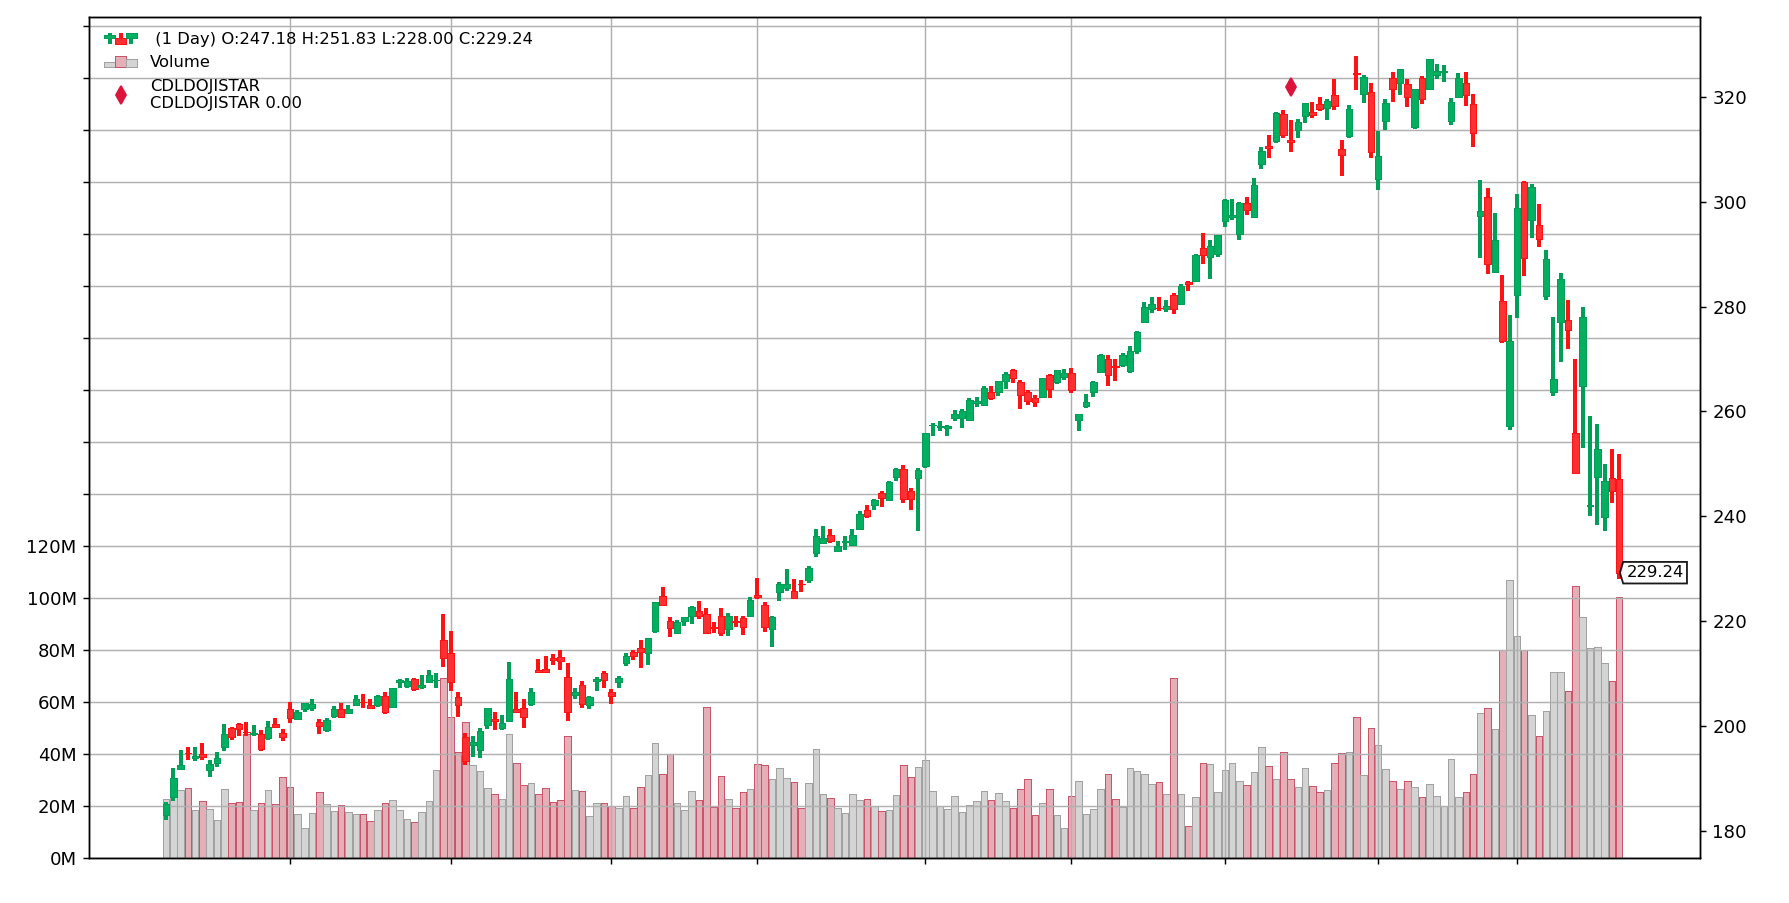

In [32]:
try_strat(aapl[-200:])

In [34]:
class MACDStrategy(bt.Strategy):
    def __init__(self):
        bt.talib.MACD(self.data)


10000.0


<IPython.core.display.Javascript object>


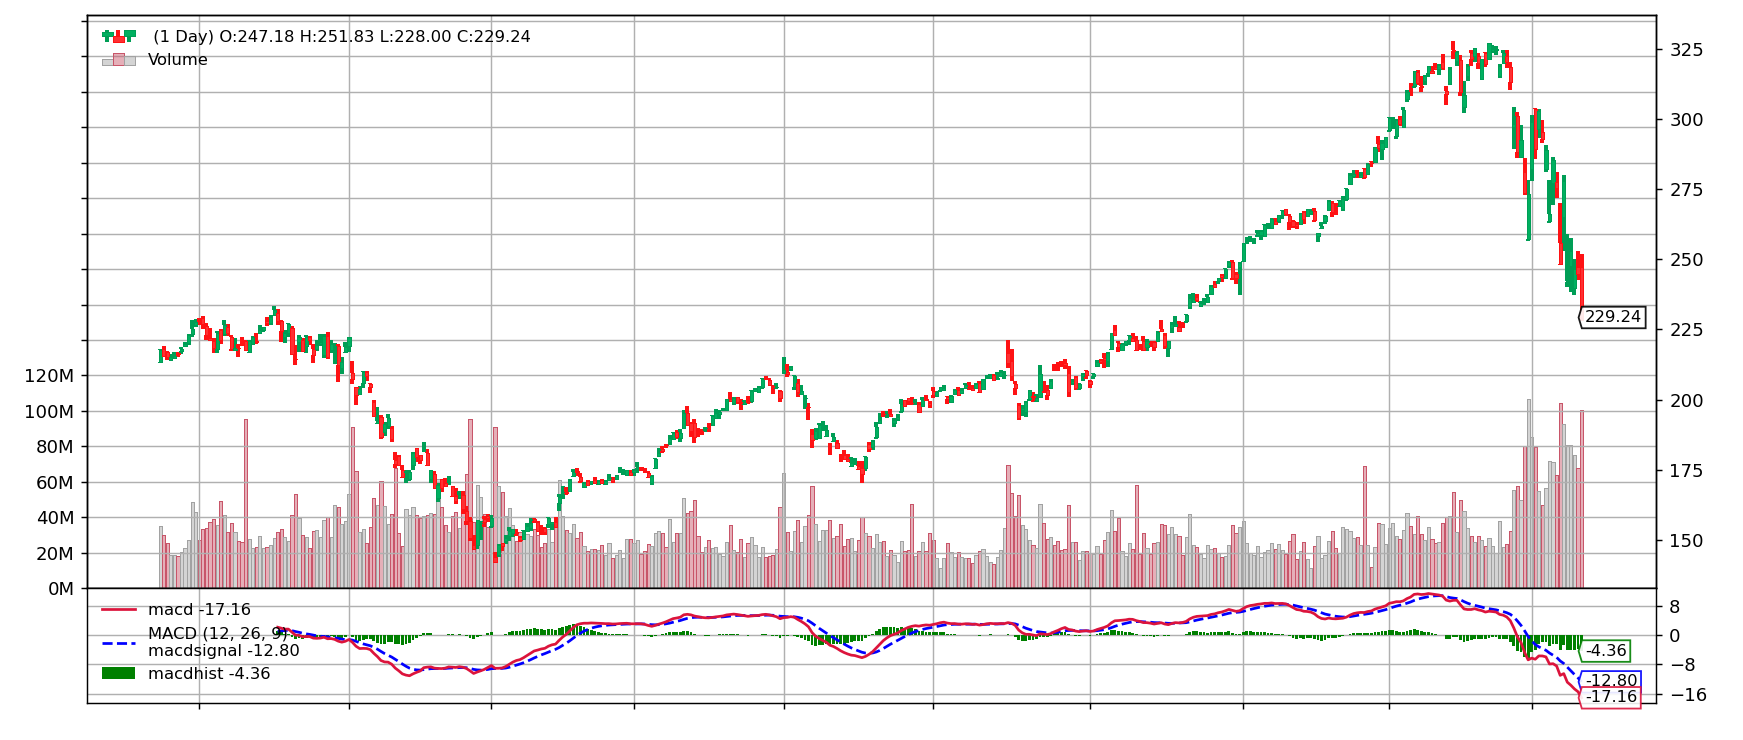

In [35]:
try_strat(aapl[-400:], MACDStrategy)

### This strategy seems to have alot of false positives

10000.0


<IPython.core.display.Javascript object>


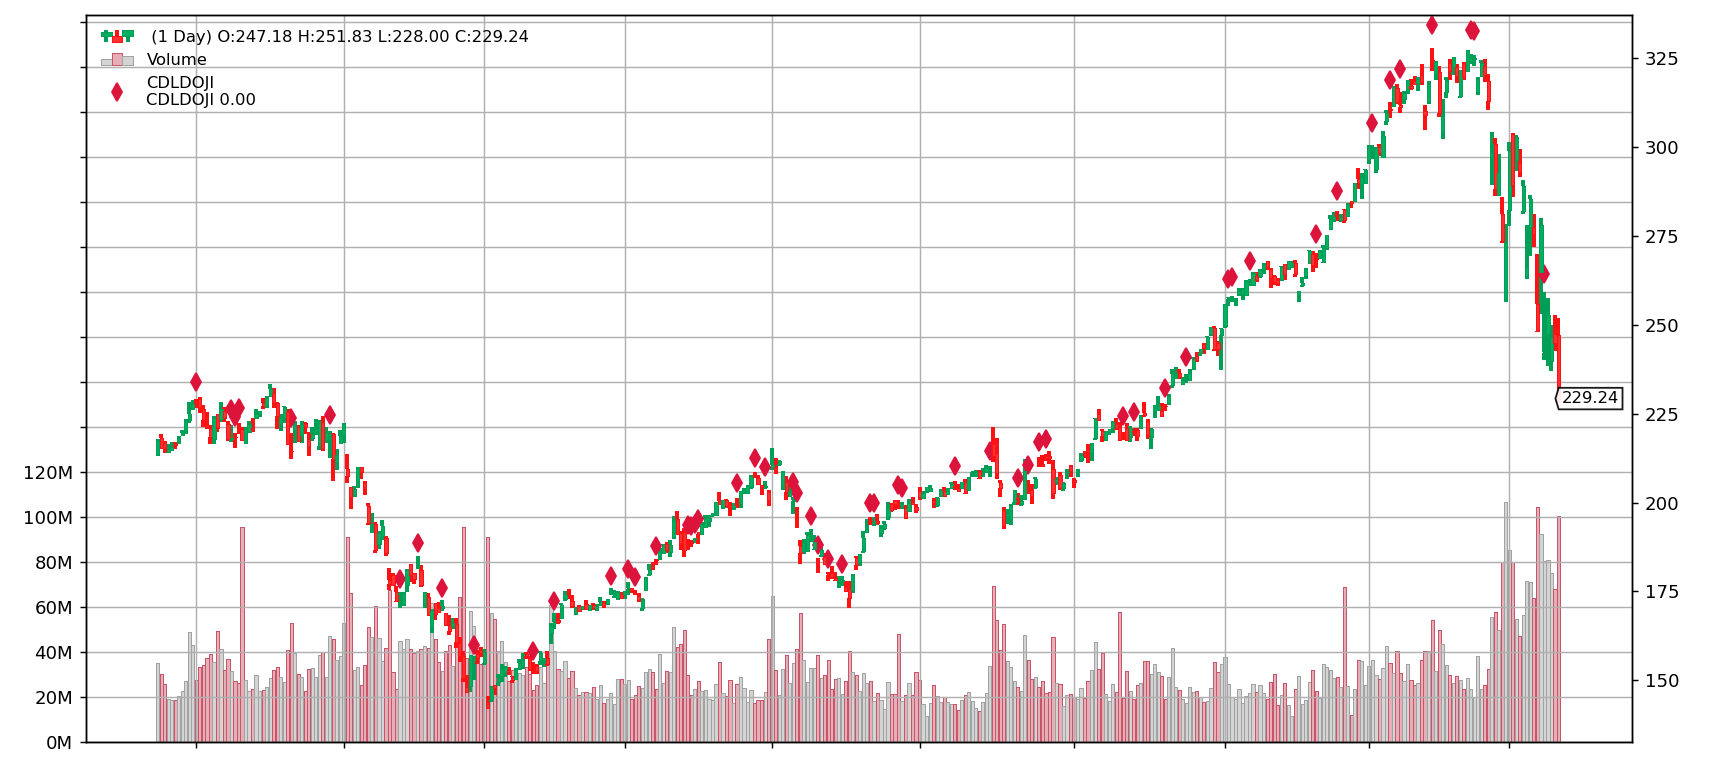

In [37]:
class DOJIStrat(bt.Strategy):
    def __init__(self):
        bt.talib.CDLDOJI(self.data.open, self.data.high,self.data.low, self.data.close)
try_strat(aapl[-400:], DOJIStrat)  

10000.0


<IPython.core.display.Javascript object>


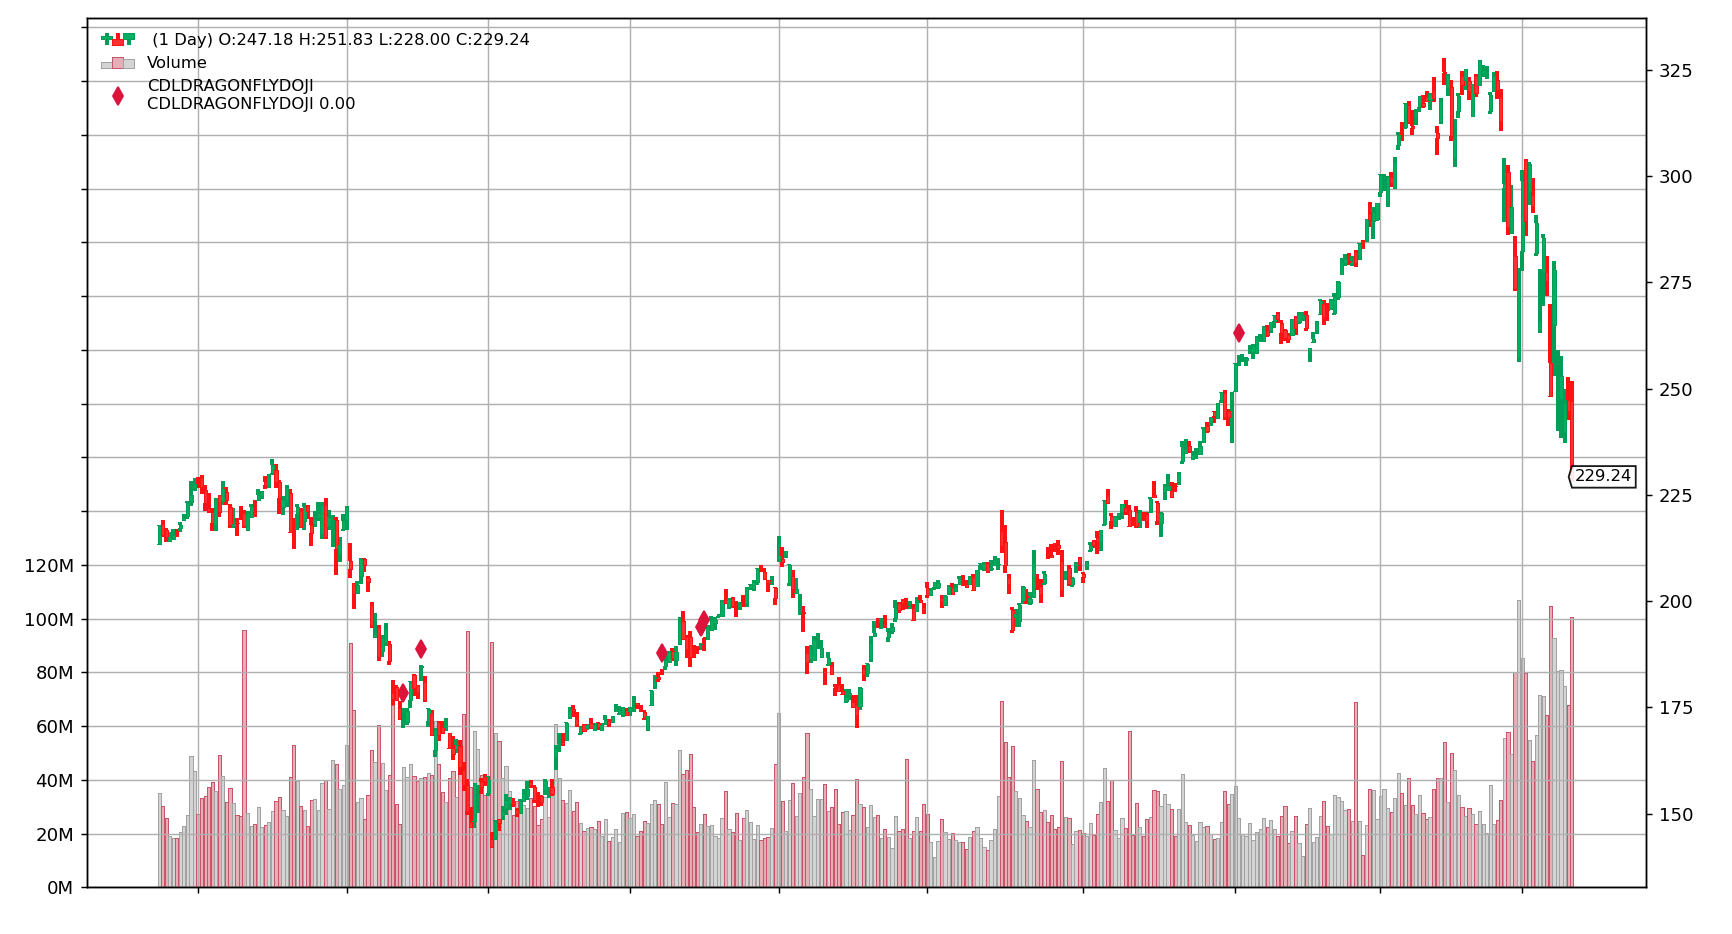

In [39]:
class HammerStrat(bt.Strategy):
    def __init__(self):
        bt.talib.CDLHAMMER(self.data.open, self.data.high,self.data.low, self.data.close)
try_strat(aapl[-400:], HammerStrat)

10000.0


<IPython.core.display.Javascript object>


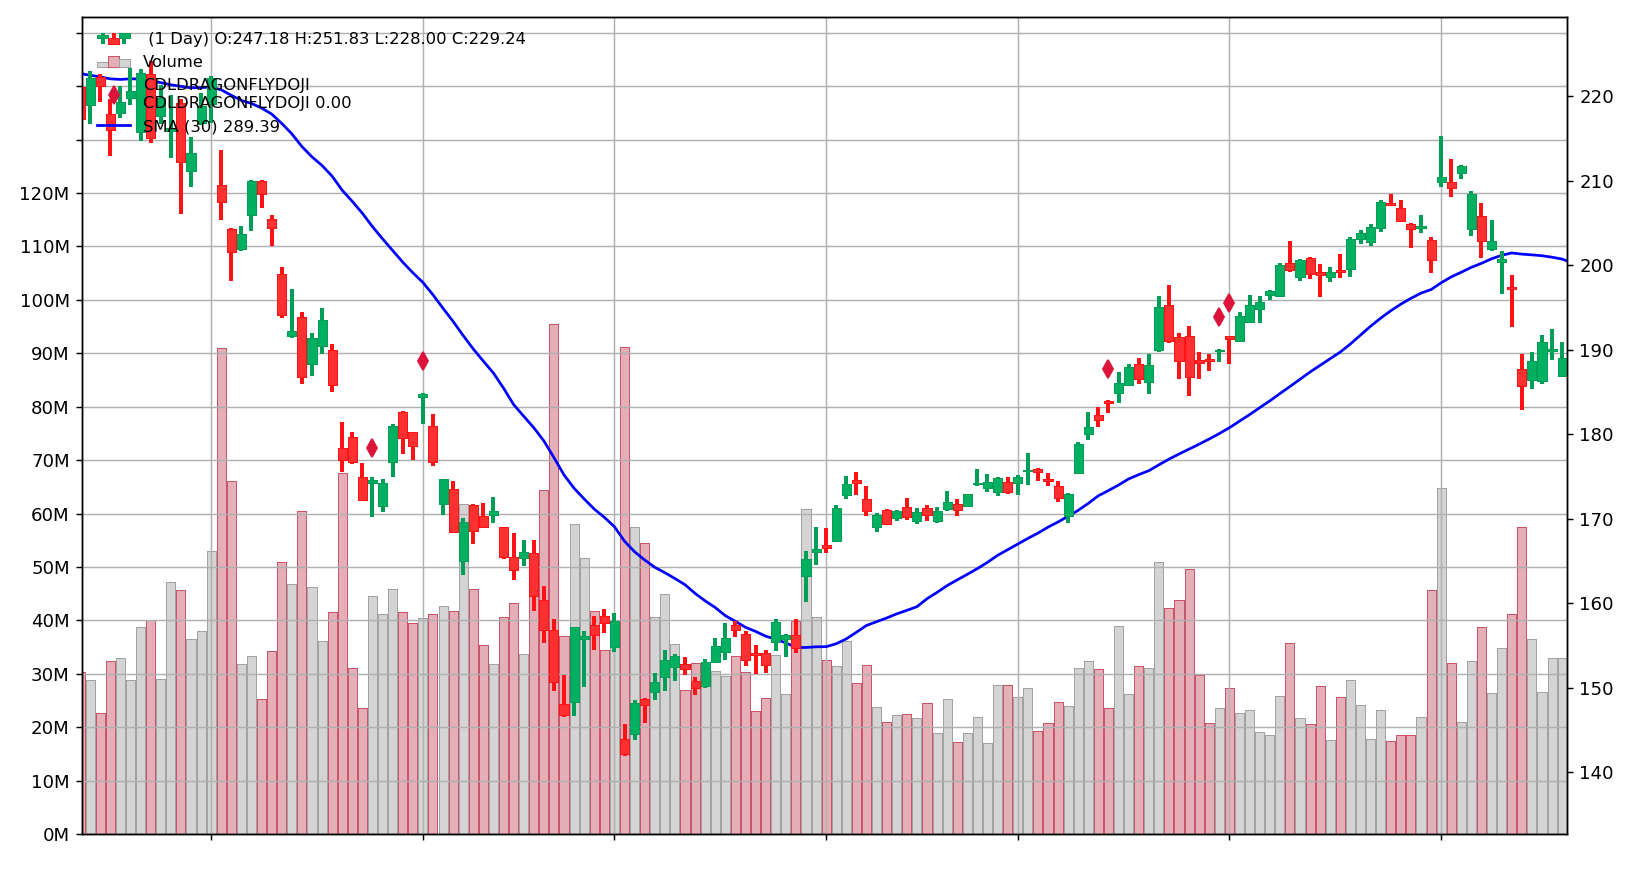

In [49]:
class DFLYStrat(bt.Strategy):
    def __init__(self):
        bt.talib.CDLDRAGONFLYDOJI(self.data.open, self.data.high,self.data.low, self.data.close)
        bt.indicators.SMA()
try_strat(aapl[-400:], DFLYStrat)

### Need to be careful with indicators
* Looks like the above is showing some examples and counter examples for TA
* Need to take into account the trendlines (MAs) when using candlestick patterns as a trigger

## Looking at relative relationships between indicators and Price values

2019-03-05, Engulfing -100.00 ;; EMA 167.66 ;; Close 175.53
2019-04-02, Engulfing 100.00 ;; EMA 182.16 ;; Close 194.02
2019-04-10, Engulfing 100.00 ;; EMA 187.47 ;; Close 200.62
2019-04-15, Engulfing 100.00 ;; EMA 189.57 ;; Close 199.23
2019-07-09, Engulfing 100.00 ;; EMA 196.39 ;; Close 201.24
2019-07-11, Engulfing -100.00 ;; EMA 197.15 ;; Close 201.75
2019-07-19, Engulfing -100.00 ;; EMA 199.43 ;; Close 202.59
2019-07-25, Engulfing -100.00 ;; EMA 201.42 ;; Close 207.02
2019-08-27, Engulfing -100.00 ;; EMA 204.84 ;; Close 204.16
2019-09-10, Engulfing 100.00 ;; EMA 207.71 ;; Close 216.70
2019-10-25, Engulfing 100.00 ;; EMA 229.98 ;; Close 246.58
2019-12-02, Engulfing -100.00 ;; EMA 256.28 ;; Close 264.16
2019-12-19, Engulfing 100.00 ;; EMA 266.07 ;; Close 280.02
2019-12-20, Engulfing -100.00 ;; EMA 266.93 ;; Close 279.44
2019-12-30, Engulfing 100.00 ;; EMA 272.96 ;; Close 291.52
2020-01-08, Engulfing 100.00 ;; EMA 281.56 ;; Close 303.19
2020-02-25, Engulfing -100.00 ;; EMA 311.60 ;; Cl

<IPython.core.display.Javascript object>


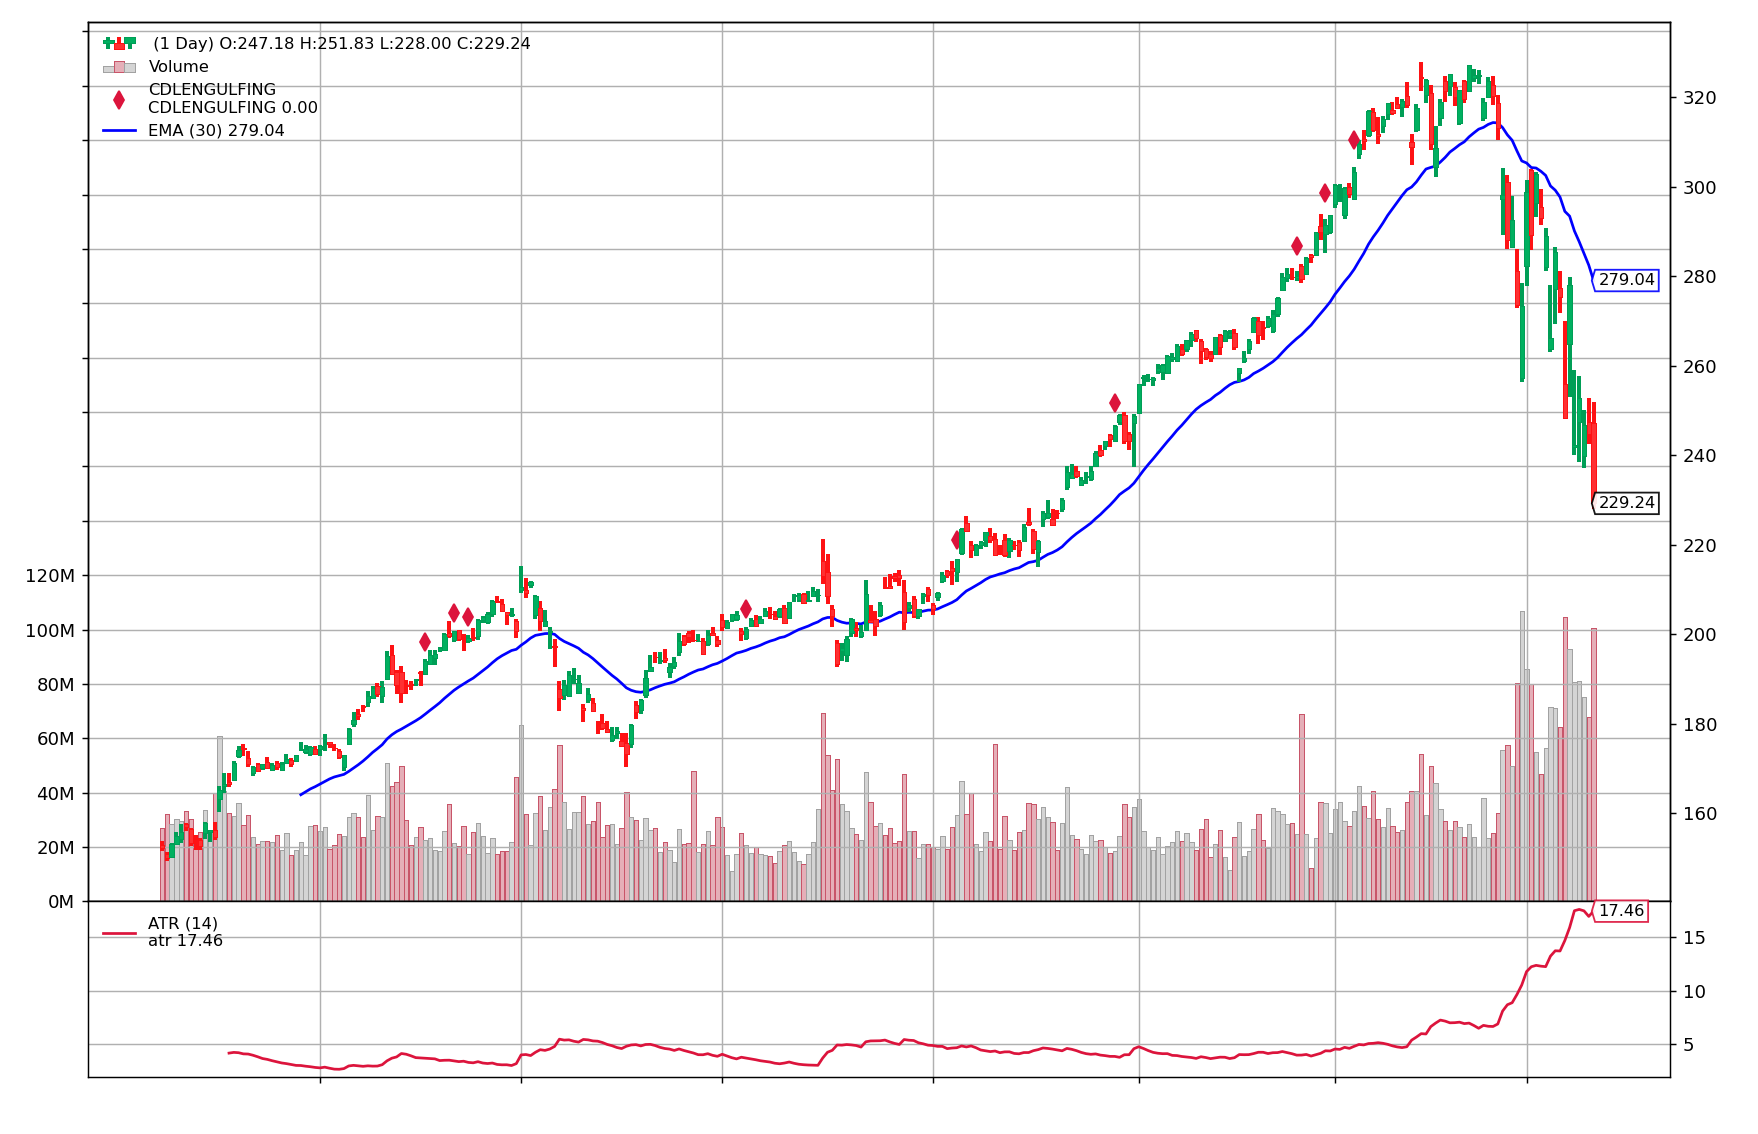

In [97]:
class EngulfingStrat(bt.Strategy):
    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))
        
    def __init__(self):
        self.e = bt.talib.CDLENGULFING(self.data.open, self.data.high,self.data.low, self.data.close)
        self.ema = bt.talib.EMA(self.data.close, 5)

    def next(self):
        if self.e[0] != 0:
            self.log('Engulfing %.2f ;; EMA %.2f ;; Close %.2f' % ( self.e[0], self.ema[0], self.data[0]) )
    
try_strat(aapl[-300:], EngulfingStrat)

In [84]:
print(bt.indicators.SMA.__doc__)


    Non-weighted average of the last n periods

    Formula:
      - movav = Sum(data, period) / period

    See also:
      - http://en.wikipedia.org/wiki/Moving_average#Simple_moving_average
    


In [73]:
talib.CDLENGULFING(aapl['Open'], aapl['High'], aapl['Low'], aapl['Close'])

Date
2010-03-22      0
2010-03-23      0
2010-03-24      0
2010-03-25   -100
2010-03-26      0
             ... 
2020-03-16      0
2020-03-17      0
2020-03-18      0
2020-03-19      0
2020-03-20      0
Length: 2518, dtype: int32

In [77]:
v = talib.MOM(aapl['Close'])
v[-30:]

Date
2020-02-07     1.72
2020-02-10    12.60
2020-02-11     1.92
2020-02-12     2.86
2020-02-13     1.00
2020-02-14    15.44
2020-02-18    10.34
2020-02-19     4.77
2020-02-20    -1.15
2020-02-21   -12.16
2020-02-24   -21.85
2020-02-25   -33.47
2020-02-26   -26.96
2020-02-27   -53.68
2020-02-28   -51.51
2020-03-02   -26.14
2020-03-03   -29.68
2020-03-04   -20.88
2020-03-05   -27.38
2020-03-06   -24.02
2020-03-09   -32.01
2020-03-10    -2.74
2020-03-11   -17.22
2020-03-12   -25.29
2020-03-13     4.61
2020-03-16   -56.60
2020-03-17   -36.46
2020-03-18   -56.07
2020-03-19   -48.14
2020-03-20   -59.79
dtype: float64

2019-03-05, Engulfing -100.00 ;; EMA 167.66 ;; Close 175.53  ;; ChStop 166.61
2019-04-02, Engulfing 100.00 ;; EMA 182.16 ;; Close 194.02  ;; ChStop 184.21
2019-04-10, Engulfing 100.00 ;; EMA 187.47 ;; Close 200.62  ;; ChStop 190.19
2019-04-15, Engulfing 100.00 ;; EMA 189.57 ;; Close 199.23  ;; ChStop 190.47
2019-07-09, Engulfing 100.00 ;; EMA 196.39 ;; Close 201.24  ;; ChStop 192.62
2019-07-11, Engulfing -100.00 ;; EMA 197.15 ;; Close 201.75  ;; ChStop 192.97
2019-07-19, Engulfing -100.00 ;; EMA 199.43 ;; Close 202.59  ;; ChStop 195.05
2019-07-25, Engulfing -100.00 ;; EMA 201.42 ;; Close 207.02  ;; ChStop 198.67
2019-08-27, Engulfing -100.00 ;; EMA 204.84 ;; Close 204.16  ;; ChStop 197.86
2019-09-10, Engulfing 100.00 ;; EMA 207.71 ;; Close 216.70  ;; ChStop 202.66
2019-10-25, Engulfing 100.00 ;; EMA 229.98 ;; Close 246.58  ;; ChStop 234.38
2019-12-02, Engulfing -100.00 ;; EMA 256.28 ;; Close 264.16  ;; ChStop 256.20
2019-12-19, Engulfing 100.00 ;; EMA 266.07 ;; Close 280.02  ;; ChStop 

<IPython.core.display.Javascript object>


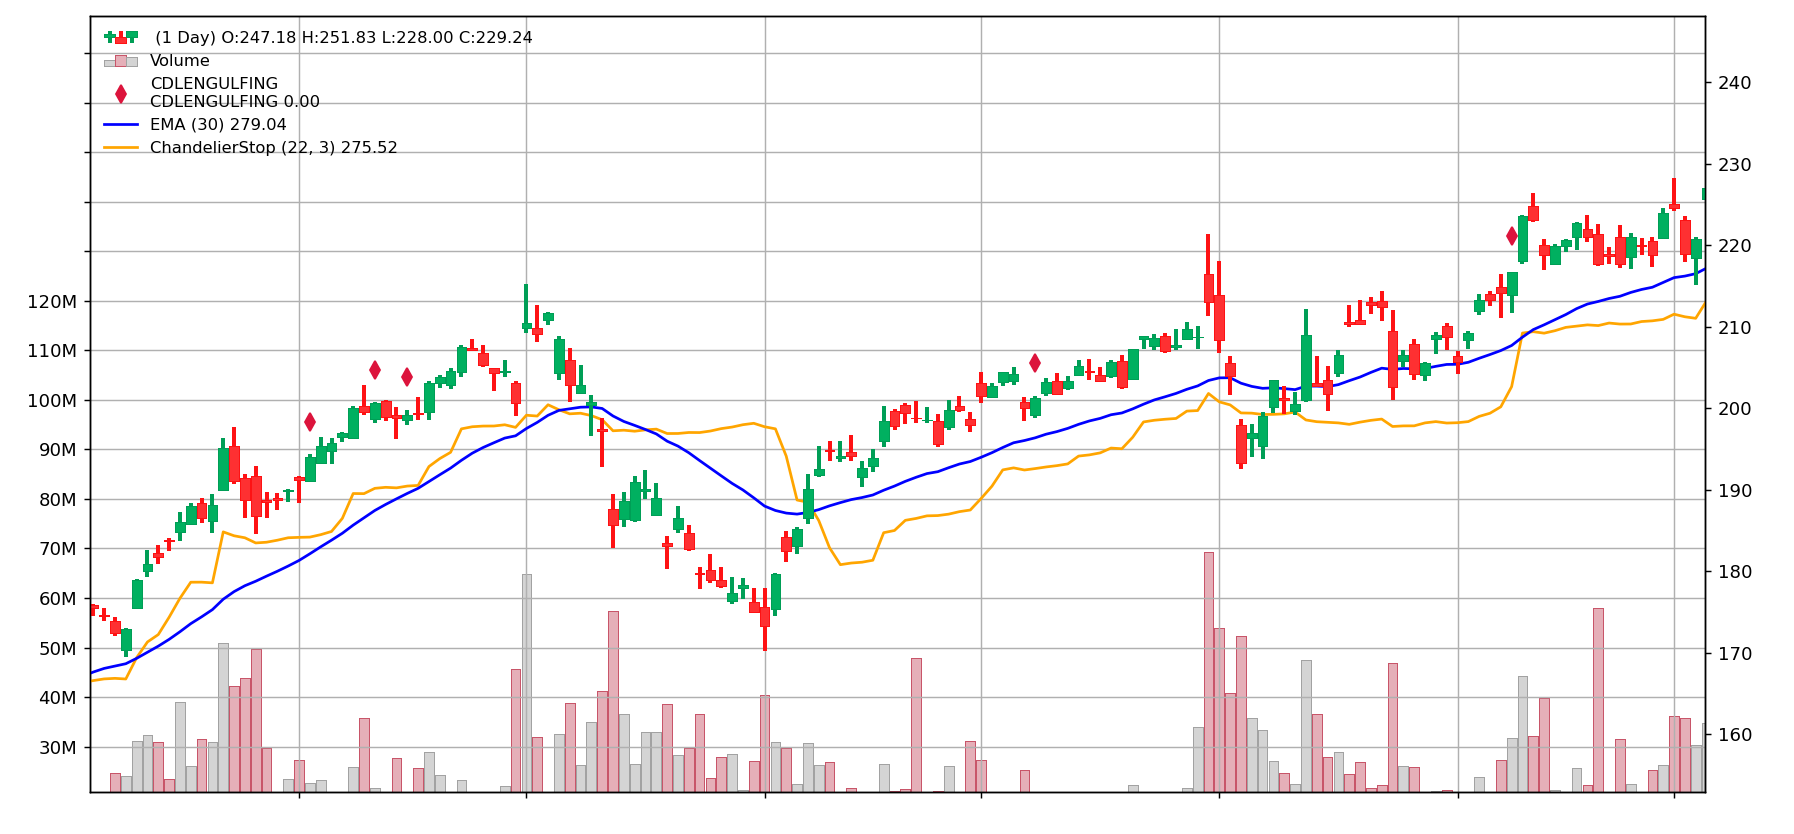

In [139]:
# Long chandelier exit
# https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/chandelier-exit/
#       
# Chandelier Exit Long: n-day Highest High – ATR (n) x Multiplier
# Chandelier Exit Short: n-day Lowest Low + ATR (n) x Multiplier
# Where:

#     N is the default unit period of 22 or the number that the trader chooses.
#     The multiplier is the default 3.0 Average True Range
#
#
class ChandelierLongStop(bt.Indicator):
    lines = ('chandelierStop',)
    params = (('period', 22), ('multiplier', 3))
    plotinfo = dict(subplot=False)
    plotlines = dict(chandelierStop=dict(color='orange', fillstyle='full'))

    def __init__(self):
        maxN = bt.indicators.Highest(self.data.close, period = self.p.period)
        atr = bt.indicators.ATR(self.data, period= self.p.period)
        self.lines.chandelierStop = maxN - atr * self.p.multiplier

class EngulfingStrat2(bt.Strategy):
    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))
        
    def __init__(self):
        self.e = bt.talib.CDLENGULFING(self.data.open, self.data.high,self.data.low, self.data.close)
        self.ema = bt.talib.EMA(self.data.close, 5)
        self.ch =  ChandelierLongStop()

    def next(self):
        if self.e[0] != 0:
            self.log('Engulfing %.2f ;; EMA %.2f ;; Close %.2f  ;; ChStop %.2f'% ( self.e[0], self.ema[0], self.data[0], self.ch[0]) )
    
try_strat(aapl[-300:], EngulfingStrat2)

### The multiplier is how closely it "hugs" prices

2019-03-05, Engulfing -100.00 ;; EMA 167.66 ;; Close 175.53  ;; ChStop 169.69
2019-04-02, Engulfing 100.00 ;; EMA 182.16 ;; Close 194.02  ;; ChStop 187.84
2019-04-10, Engulfing 100.00 ;; EMA 187.47 ;; Close 200.62  ;; ChStop 193.67
2019-04-15, Engulfing 100.00 ;; EMA 189.57 ;; Close 199.23  ;; ChStop 193.85
2019-07-09, Engulfing 100.00 ;; EMA 196.39 ;; Close 201.24  ;; ChStop 196.55
2019-07-11, Engulfing -100.00 ;; EMA 197.15 ;; Close 201.75  ;; ChStop 196.79
2019-07-19, Engulfing -100.00 ;; EMA 199.43 ;; Close 202.59  ;; ChStop 198.58
2019-07-25, Engulfing -100.00 ;; EMA 201.42 ;; Close 207.02  ;; ChStop 202.06
2019-08-27, Engulfing -100.00 ;; EMA 204.84 ;; Close 204.16  ;; ChStop 202.92
2019-09-10, Engulfing 100.00 ;; EMA 207.71 ;; Close 216.70  ;; ChStop 207.34
2019-10-25, Engulfing 100.00 ;; EMA 229.98 ;; Close 246.58  ;; ChStop 238.45
2019-12-02, Engulfing -100.00 ;; EMA 256.28 ;; Close 264.16  ;; ChStop 260.08
2019-12-19, Engulfing 100.00 ;; EMA 266.07 ;; Close 280.02  ;; ChStop 

<IPython.core.display.Javascript object>


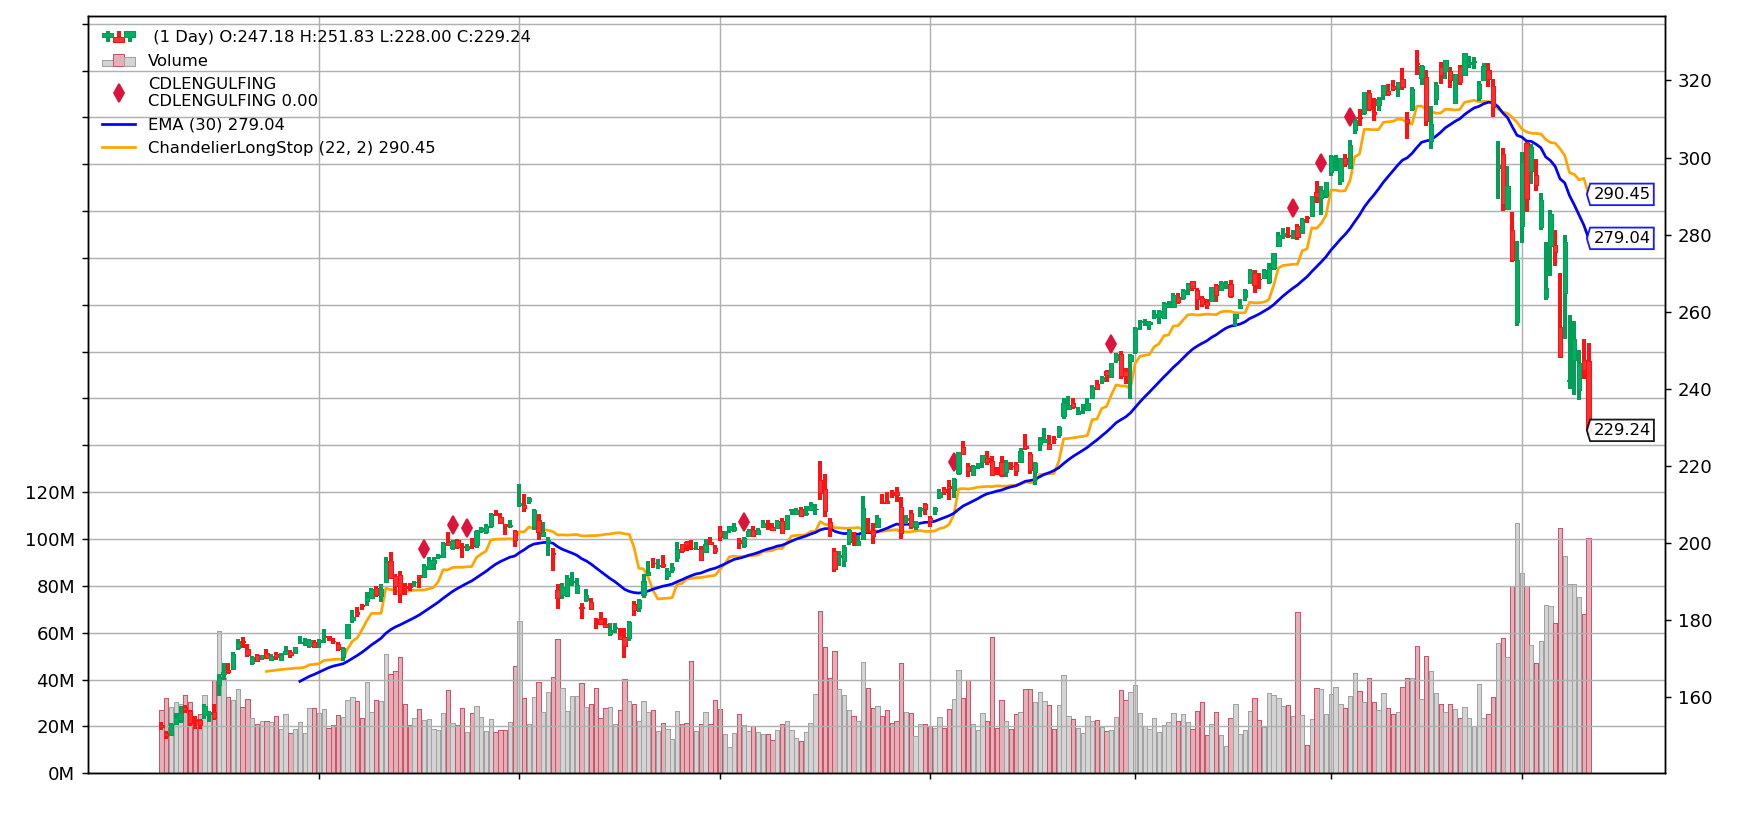

In [145]:
class ChandelierLongStop(bt.Indicator):
    lines = ('chandelierStop',)
    params = (('period', 22), ('multiplier', 2))
    plotinfo = dict(subplot=False)
    plotlines = dict(chandelierStop=dict(color='orange', fillstyle='full'))

    def __init__(self):
        maxN = bt.indicators.Highest(self.data.close, period = self.p.period)
        atr = bt.indicators.ATR(self.data, period= self.p.period)
        self.lines.chandelierStop = maxN - atr * self.p.multiplier

class EngulfingStrat2(bt.Strategy):
    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))
        
    def __init__(self):
        self.e = bt.talib.CDLENGULFING(self.data.open, self.data.high,self.data.low, self.data.close)
        self.ema = bt.talib.EMA(self.data.close, 5)
        self.ch =  ChandelierLongStop()

    def next(self):
        if self.e[0] != 0:
            self.log('Engulfing %.2f ;; EMA %.2f ;; Close %.2f  ;; ChStop %.2f'% ( self.e[0], self.ema[0], self.data[0], self.ch[0]) )
try_strat(aapl[-300:], EngulfingStrat2)

2019-04-01, EMA 181.35 ;; Close 191.24
2019-05-29, EMA 190.80 ;; Close 177.38
2019-08-22, EMA 204.93 ;; Close 212.46
2019-08-23, EMA 204.78 ;; Close 202.64
2019-08-30, EMA 205.39 ;; Close 208.74
2019-09-03, EMA 205.41 ;; Close 205.70
2019-09-04, EMA 205.65 ;; Close 209.19
2019-09-05, EMA 206.14 ;; Close 213.28
2019-09-10, EMA 207.71 ;; Close 216.70
2019-09-12, EMA 209.66 ;; Close 223.09
2019-09-13, EMA 210.25 ;; Close 218.75
2019-09-16, EMA 210.87 ;; Close 219.90
2019-09-17, EMA 211.50 ;; Close 220.70
2019-09-18, EMA 212.23 ;; Close 222.77
2019-09-19, EMA 212.79 ;; Close 220.96
2019-09-20, EMA 213.11 ;; Close 217.73
2019-09-23, EMA 213.47 ;; Close 218.72
2020-03-12, EMA 294.50 ;; Close 248.23
2020-03-13, EMA 293.43 ;; Close 277.97
10000.0


<IPython.core.display.Javascript object>


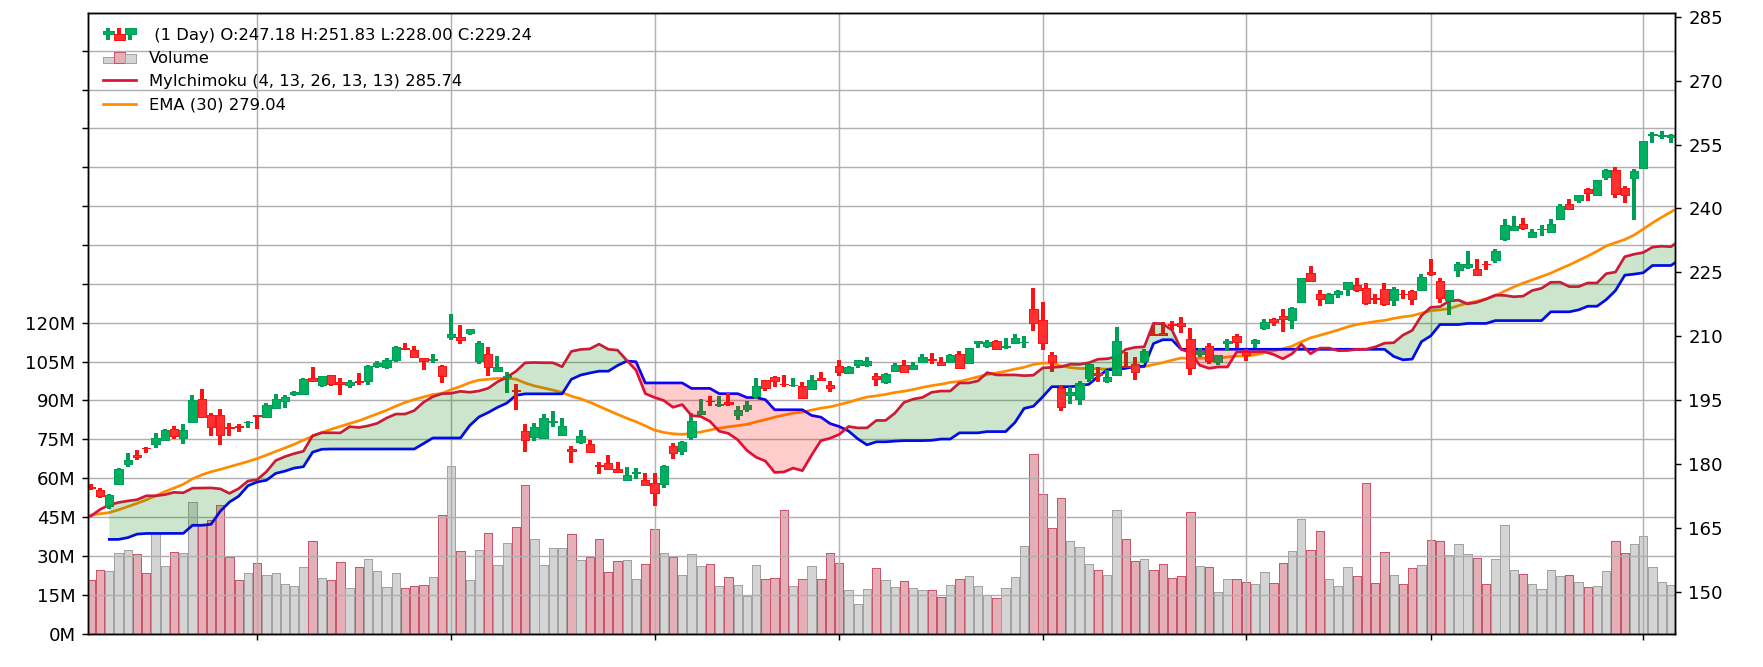

In [187]:
class MyIchimoku(bt.Indicator):
    lines = (
            #'tenkan_sen', 
            # 'kijun_sen',
             'senkou_span_a', 
             'senkou_span_b', 
             'chikou_span',
            )
#   Defaults
#
#     params = (
#         ('tenkan', 9),
#         ('kijun', 26),
#         ('senkou', 52),
#         ('senkou_lead', 26),  # forward push
#         ('chikou', 26),  # backwards push
#     )

    params = (
        ('tenkan', 4),
        ('kijun', 13),
        ('senkou', 26),
        ('senkou_lead', 13),  # forward push
        ('chikou', 13),  # backwards push
    )
    plotinfo = dict(subplot=False)
    plotlines = dict(
        senkou_span_a=dict(_fill_gt=('senkou_span_b', 'g'),
                           _fill_lt=('senkou_span_b', 'r')),
    )

    def __init__(self):
        hi_tenkan = bt.indicators.Highest(self.data.high, period=self.p.tenkan)
        lo_tenkan = bt.indicators.Lowest(self.data.low, period=self.p.tenkan)
        tenkan_sen = (hi_tenkan + lo_tenkan) / 2.0
        # self.l.tenkan_sen = tenkan_sen
        
        hi_kijun = bt.indicators.Highest(self.data.high, period=self.p.kijun)
        lo_kijun = bt.indicators.Lowest(self.data.low, period=self.p.kijun)
        kijun_sen = (hi_kijun + lo_kijun) / 2.0
        # self.l.kijun_sen = kijun_sen
        
        senkou_span_a = (tenkan_sen + kijun_sen) / 2.0
        
        self.l.senkou_span_a = senkou_span_a(-self.p.senkou_lead)

        hi_senkou = bt.indicators.Highest(self.data.high, period=self.p.senkou)
        lo_senkou = bt.indicators.Lowest(self.data.low, period=self.p.senkou)
        senkou_span_b = (hi_senkou + lo_senkou) / 2.0
        
        self.l.senkou_span_b = senkou_span_b(-self.p.senkou_lead)

        # self.l.chikou_span = self.data.close(self.p.chikou)

class IchimokuStrategy(bt.Strategy):
    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))
        
    def __init__(self):
        self.ichimoku = MyIchimoku()
        self.ema = bt.talib.EMA(self.data.close, 20)
        # self.ch =  ChandelierLongStop()

    def next(self):
        kumo_crossover = abs(self.ichimoku.senkou_span_a-self.ichimoku.senkou_span_b)
        if (self.data[0] * 0.005) > kumo_crossover:
            self.log('EMA %.2f ;; Close %.2f'% ( self.ema[0], self.data[0]) )
try_strat(aapl[-300:], IchimokuStrategy)